In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


    stone (>=2.*)
           ~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os

# Define the directory where you want to save the CSV file
save_dir = "Data Engineering"  # Change this if you want a different directory

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the CSV file path inside the directory
csv_file_path = os.path.join(save_dir, "tmdb_movies.csv")


In [4]:
df.to_csv(csv_file_path, index=False)

Dataset saved as 'tmdb_movies.csv'.


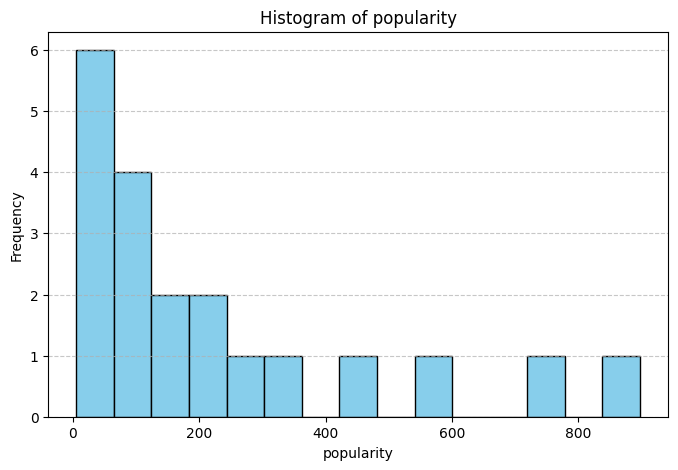

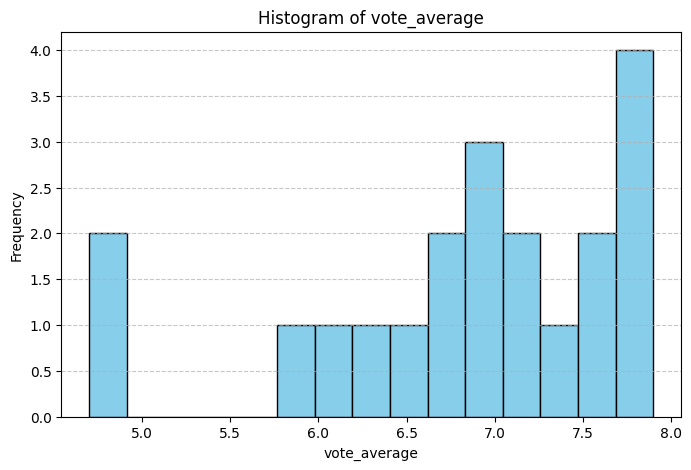

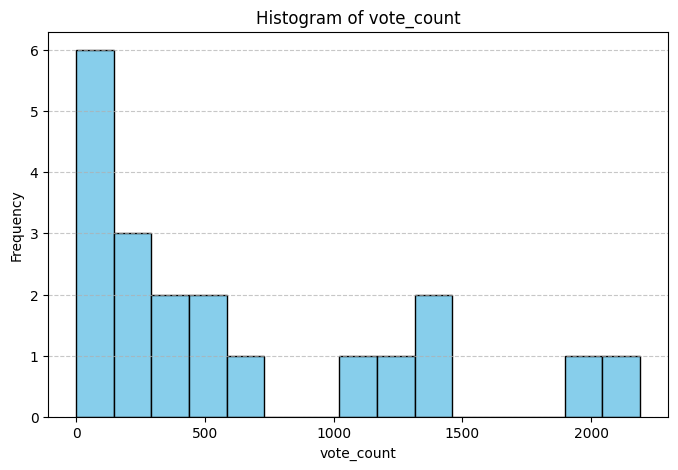

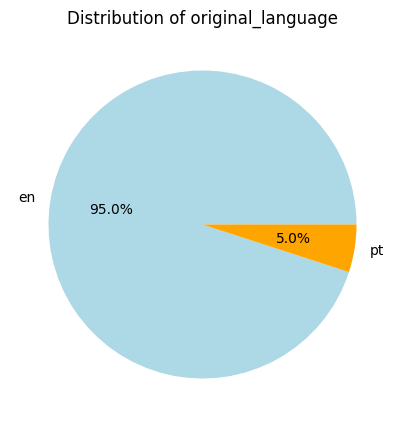

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# TMDb API details
API_KEY = "32958f16314b73597c8b327e9c3b19eb"  # Replace with your TMDb API key
BASE_URL = "https://api.themoviedb.org/3"

# Endpoint for trending movies
url = f"{BASE_URL}/trending/movie/week?api_key={API_KEY}"

# Fetch data from TMDb API
try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()["results"]  # Extracting movie results
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")
    data = None

# Proceed only if data is available
if data:
    # Convert data to Pandas DataFrame
    df = pd.DataFrame(data)

    # Save dataset to CSV (FIXED PATH)
    csv_file_path = "tmdb_movies.csv"  # Saves in the current directory
    df.to_csv(csv_file_path, index=False)
    print(f"Dataset saved as '{csv_file_path}'.")

    # Identify numerical and categorical columns
    numerical_columns = ["popularity", "vote_average", "vote_count"]
    categorical_columns = ["original_language"]

    # Plot histograms for numerical values
    for col in numerical_columns:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            plt.hist(df[col].dropna(), bins=15, color='skyblue', edgecolor='black')
            plt.title(f"Histogram of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.show()

    # Plot pie chart for categorical values
    for col in categorical_columns:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'orange', 'green', 'red'])
            plt.title(f"Distribution of {col}")
            plt.ylabel("")  # Hide y-label
            plt.show()
else:
    print("Data fetching failed.")
